<a href="https://colab.research.google.com/github/Immaczx/ModeladoySimulacion/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camilo Pelaez Garcia COD: 817047

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

In [79]:
def diagVectorial(F):
    v=F
    u=np.ones(v.shape)
    plt.figure(figsize=(7,6))
    plt.title(r'Campo vectorial para $r$ = %f' % r[i])
    plt.quiver(X,Y,u,v)
    plt.grid()

def diagRoots(F,r,b):
    x=np.linspace(-10,10,100)
    x_dot=F(x,r,b)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.spines['left'].set_position(('data',0.0))
    ax.spines['bottom'].set_position(('data',0.0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    #plt.axis([-5, 5, -5, 5])
    plt.plot(x,x_dot)
    plt.grid()

    x=sp.symbols('x')
    x_dot1=F(x,r,b)
    roots=sp.solve(x_dot1)
    print(roots)
    for j in range(len(roots)):
      plt.plot(roots[j],0,'ro')

def diagBifurcacion(fun,x01,x02,r1,r2):
  ti=0; tf=100; dt=100
  tspam=[ti, tf]

  for r in np.arange(r1,r2,0.2):
    for x0 in np.arange(x01,x02,0.7):
      sol=solve_ivp(fun,tspam,[x0],args=(r,2))
      plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

  tspam=[ti, -tf]

  for r in np.arange(r1,r2,0.2):
    for x0 in np.arange(x01,x02,0.7):
      sol=solve_ivp(fun,tspam,[x0],args=(r,2))
      plt.scatter(r, sol.y[0][-1], color='red', marker='.')


  plt.axis([x01, x02, -10, 10])
  plt.grid()

## 3.1 Bifurcación de punto de silla

*   Para los siguientes ejercicos, grafique todos los posibles campos vectoriales cualitativamente diferentes cuando r varía.
*   Demuestre que se produce una bifurcación de punto de silla en un valor crítico de r.

*   Grafique el diagrama de bifurcación de puntos fijos x vs r





### 3.1.1
\begin{equation}
\dot{x} =1+rx+{x}^{2}
\end{equation}

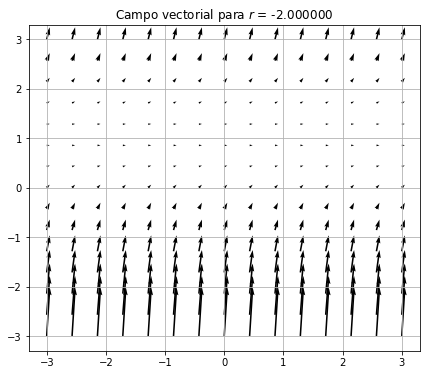

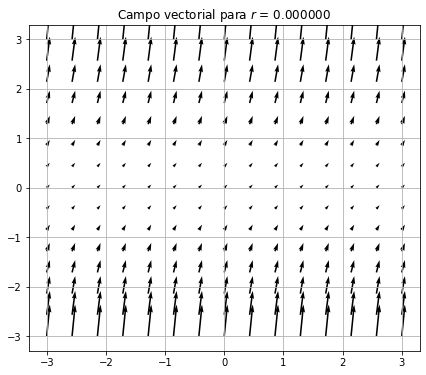

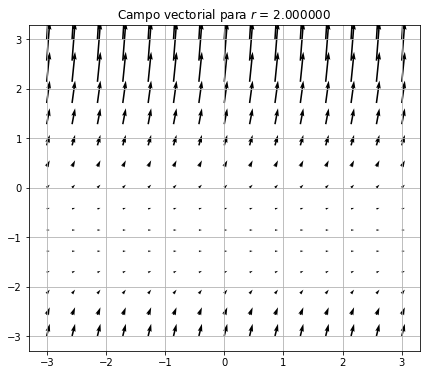

In [46]:
r=[-2, 0, 2]
x=np.linspace(-3,3,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(1+r[i]*Y+Y**2)

[-1]


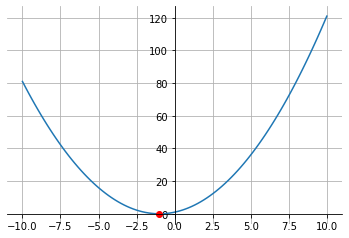

In [47]:
def fun (x,r,b):
  return 1+r*x+x**2
r=b=2
diagRoots(fun,r,b)

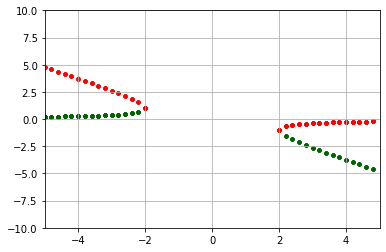

In [80]:
def fun (t,x,r,b):
  return 1+r*x+x**2

diagBifurcacion(fun,-5,5,-5,5)


### 3.1.2
\begin{equation}
\dot{x} =r-cosh(x)
\end{equation}

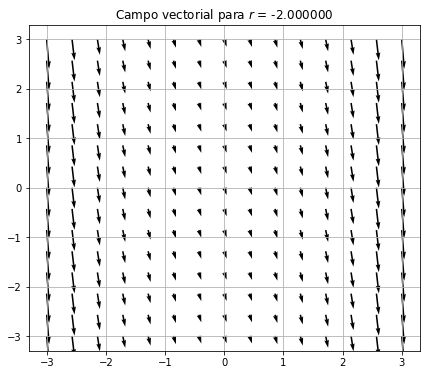

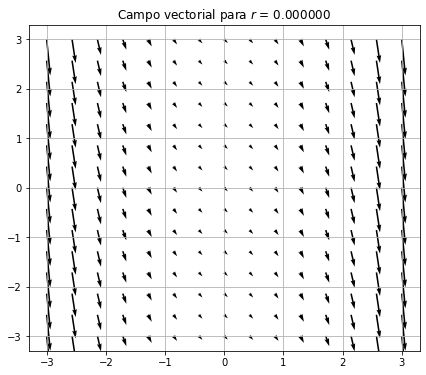

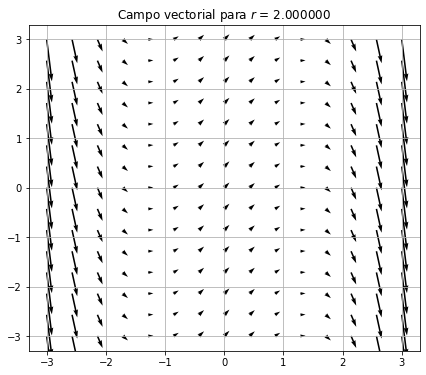

In [49]:
r=[-2, 0, 2]
x=np.linspace(-3,3,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]-np.cosh(X))

[0]


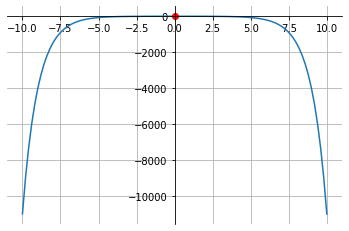

In [82]:
def fun (x,r,b):
  if isinstance(x, np.ndarray):
    return r-np.cosh(x)
  else:
    return r-sp.cosh(x)
r=b=1
diagRoots(fun,r,b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  


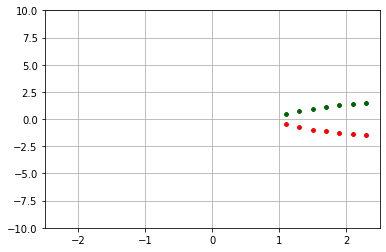

In [83]:
def fun (t,x,r,b):
  return r-np.cosh(x)
diagBifurcacion(fun,-2.5,2.5,-2.5,2.5)

### 3.1.3
\begin{equation}
\dot{x} =r+x-ln(1+x)
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


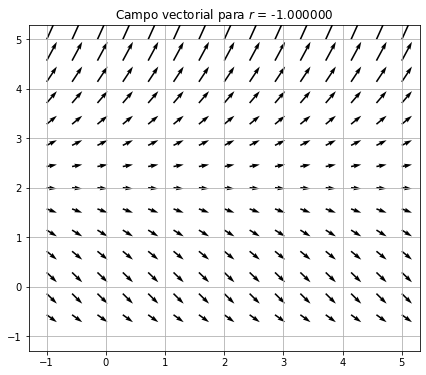

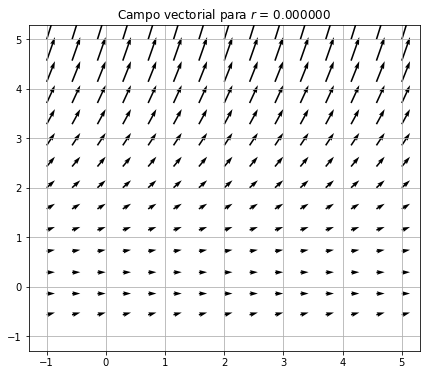

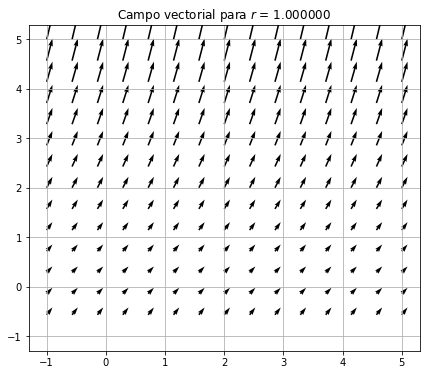

In [54]:
r=[-1, 0, 1]
x=np.linspace(-1,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]+Y-np.log(1+Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 0]


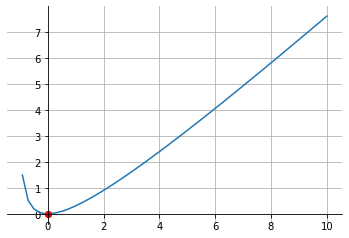

In [62]:
def fun (x,r,b):
  if isinstance(x, np.ndarray):
    return r+x-np.log(1+x)
  else:
    return r+x-sp.log(1+x)
r=b=0
diagRoots(fun,r,b)

In [ ]:
def fun (t,x,r,b):
  return r+x-np.log(1+x)
diagBifurcacion(fun,-2,3,-2,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


### 3.1.4
\begin{equation}
\dot{x} =r+\frac{1}{2}x-\frac{x}{1+x}
\end{equation}

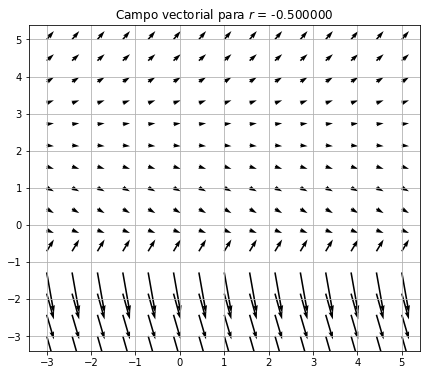

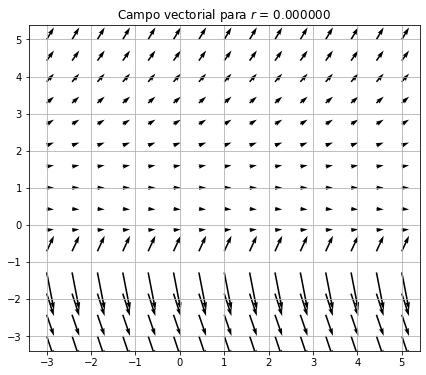

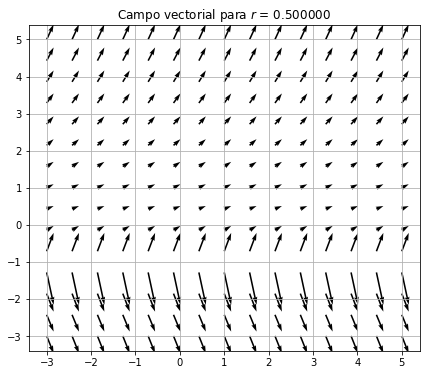

In [64]:
r=[-1/2, 0, 1/2]
x=np.linspace(-3,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]+(1/2)*Y-(Y)/(1+Y))

[0.39 - 0.260576284415908*I, 0.39 + 0.260576284415908*I]


TypeError: ignored

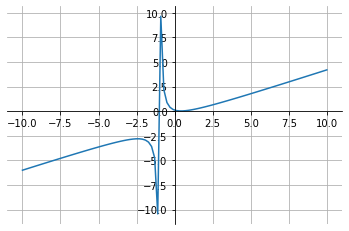

In [100]:
def fun (x,r,b):
  return r+(1/2)*x-(x/(1+x))
r=b=0.11
diagRoots(fun,r,b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:111: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


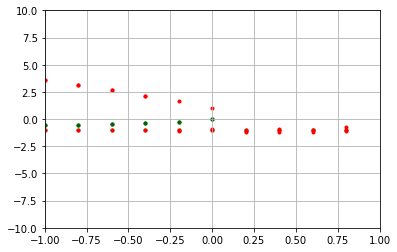

In [101]:
def fun (t,x,r,b):
  return r+(1/2)*x-(x/(1+x))

diagBifurcacion(fun,-1,1,-1,1)

### 3.1.5
??????

## 3.2 Bifurcación transcritica

*   Para los siguientes ejercicos, grafique todos los posibles campos vectoriales cualitativamente diferentes cuando r varía.
*   Demuestre que se produce una bifurcación de punto de silla en un valor crítico de r.

*   Grafique el diagrama de bifurcación de puntos fijos x vs r

### 3.2.1
\begin{equation}
\dot{x} =rx+x^2
\end{equation}

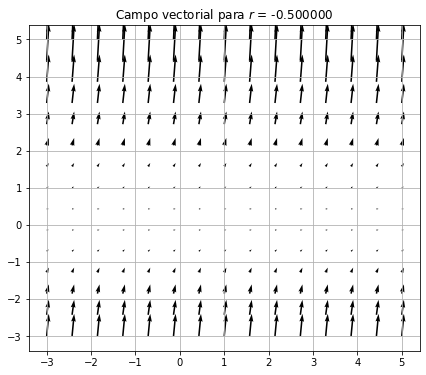

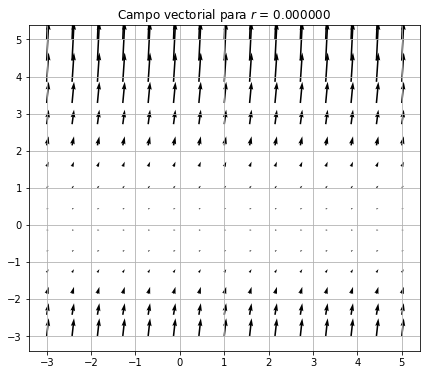

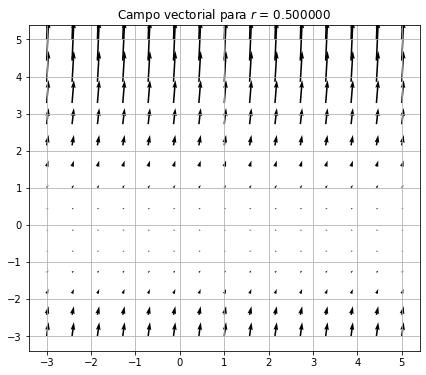

In [67]:
r=[-1/2, 0, 1/2]
x=np.linspace(-3,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]*Y+Y**2 )

[0]


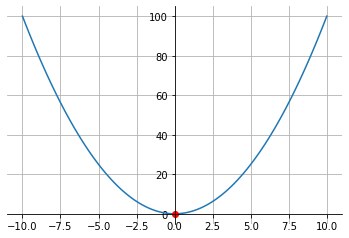

In [68]:
def fun (x,r,b):
  return r*x+x**2
r=b=0
diagRoots(fun,r,b)

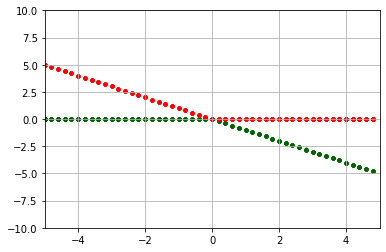

In [90]:
def fun (t,x,r,b):
  return r*x+x**2

diagBifurcacion(fun,-5,5,-5,5)

### 3.2.2
\begin{equation}
\dot{x} =rx-ln(1+x)
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


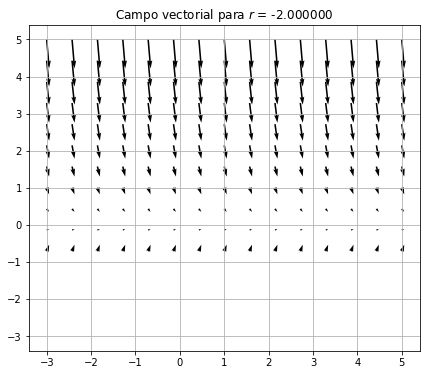

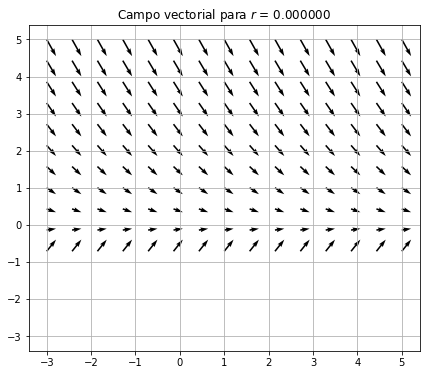

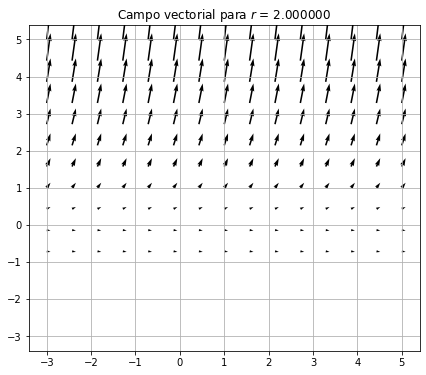

In [70]:
r=[-2, 0, 2]
x=np.linspace(-3,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]*Y-np.log(1+Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


[0]


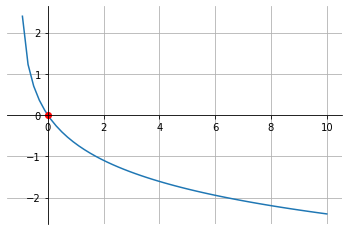

In [71]:
def fun (x,r,b):
  if isinstance(x, np.ndarray):
    return r*x-np.log(1+x)
  else:
    return r*x-sp.log(1+x)
r=b=0
diagRoots(fun,r,b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/common.py:111: RuntimeWarning: invalid value encountered in multiply
  y1 = y0 + h0 * direction * f0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


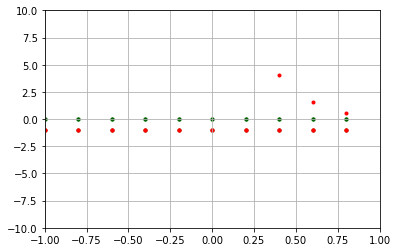

In [91]:
def fun (t,x,r,b):
  return r*x-np.log(1+x)

diagBifurcacion(fun,-1,1,-1,1)

### 3.2.3
\begin{equation}
\dot{x} =x-rx(1-x)
\end{equation}

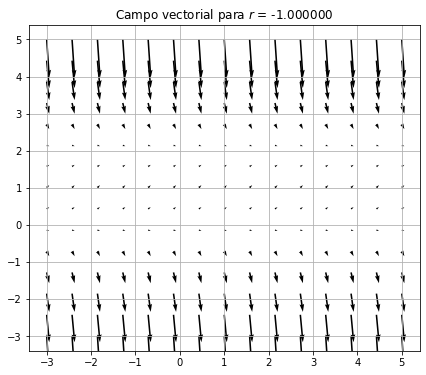

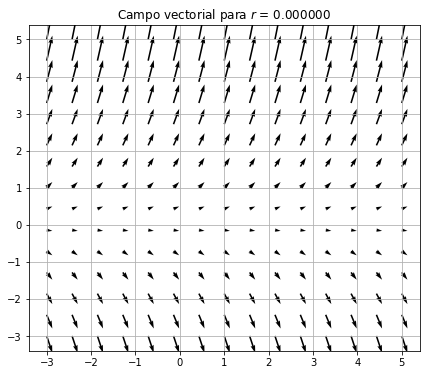

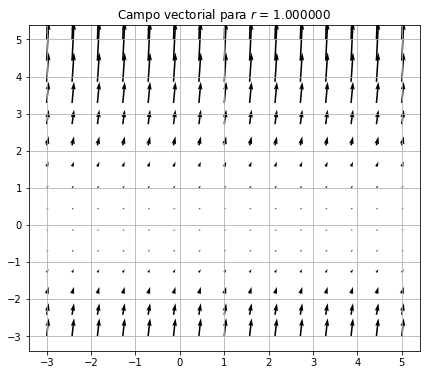

In [73]:
r=[-1, 0, 1]
x=np.linspace(-3,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(Y-r[i]*Y*(1-Y))

[0]


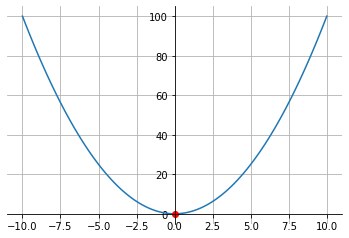

In [78]:
def fun (x,r,b):
  return x-r*x*(1-x)
r=b=1
diagRoots(fun,r,b)

In [ ]:
def fun (t,x,r,b):
  return x-r*x*(1-x)

diagBifurcacion(fun)

### 3.2.4
\begin{equation}
\dot{x} =x(r-{e}^{x})
\end{equation}

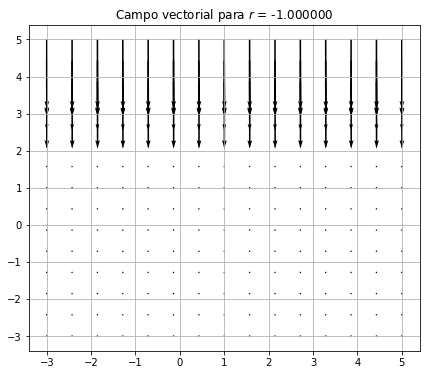

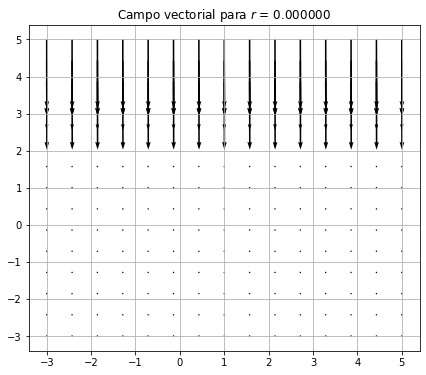

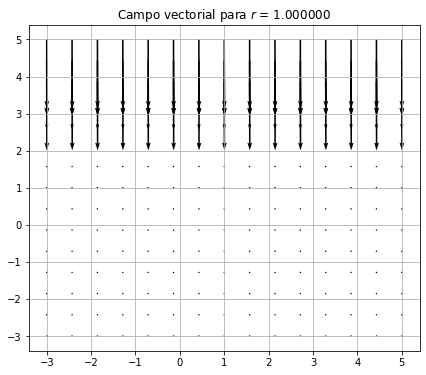

In [75]:
r=[-1, 0, 1]
x=np.linspace(-3,5,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(Y*(r[i]-np.exp(Y)))

[0]


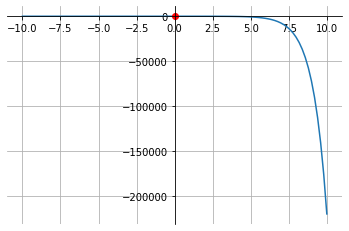

In [76]:
def fun (x,r,b):
  if isinstance(x, np.ndarray):
    return x*(r-np.exp(x))
  else:
    return x*(r-sp.exp(x))
r=b=0
diagRoots(fun,r,b)

In [ ]:
def fun (t,x,r,b):
  return x*(r-np.exp(x))

diagBifurcacion(fun)

### 3.2.5
??????

### 3.4.1
\begin{equation}
\dot{x} =rx+4x^3
\end{equation}

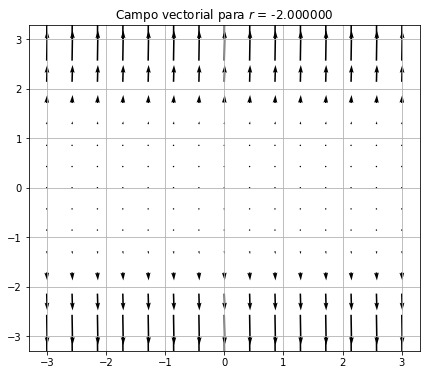

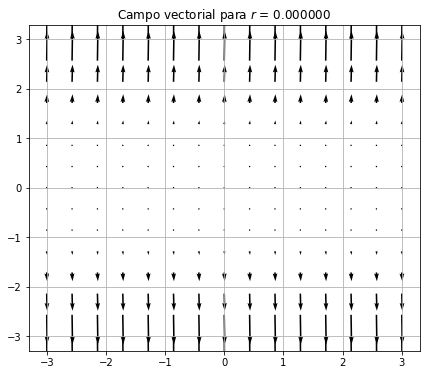

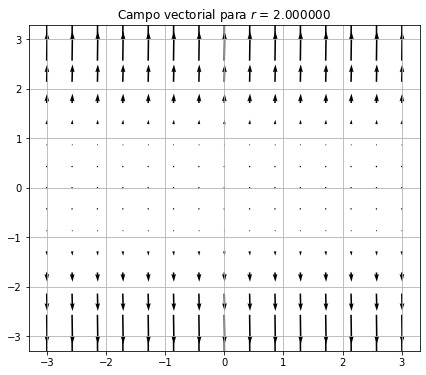

In [77]:
r=[-2, 0, 2]
x=np.linspace(-3,3,15)
y=x
X,Y=np.meshgrid(x,y)
for i in range(0,3):
  diagVectorial(r[i]*Y+4*Y**3)

In [ ]:
def fun (x,r,b):
  return r+(1/2)*x-(x/(1+x))
r=b=0
diagRoots(fun,r,b)

In [ ]:
def fun (t,x,r,b):
  return r+(1/2)*x-(x/(1+x))

diagBifurcacion(fun)

### 3.4.2
\begin{equation}
\dot{x} =rx-sinh(x)
\end{equation}

### 3.4.3
\begin{equation}
\dot{x} =rx-4x^3
\end{equation}

### 3.4.4
\begin{equation}
\dot{x} =x+\frac{rx}{1+x^2}
\end{equation}

En los siguientes ejercicios
*   Encuentre los valores de r en los que se encuentran las bifurcaciones y clasifiquelos
*   Grafique el diagrama de bifurcación



### 3.4.5
\begin{equation}
\dot{x} =r-3x^3
\end{equation}

### 3.4.6
\begin{equation}
\dot{x} =rx-\frac{x}{1+x}
\end{equation}

### 3.4.7
\begin{equation}
\dot{x} =5-r{e}^{{-x}^{2}}
\end{equation}

### 3.4.8
\begin{equation}
\dot{x} =rx-\frac{x}{1+x^2}
\end{equation}

### 3.4.9
\begin{equation}
\dot{x} =x+tanh(rx)
\end{equation}

### 3.4.4
\begin{equation}
\dot{x} =rx+\frac{x^3}{1+x^2}
\end{equation}